## Final Project Submission

Please fill out:
* Student name: Thomas Tomson
* Student pace: self paced / part time / full time:full time
* Scheduled project review date/time:27/07/2025
* Instructor name: Bonface Manyara.
* Blog post URL:https://colab.research.google.com/drive/16tVWpq5Ozp7fR8-46pgSlGH163BoN0t2#scrollTo=83fv7b_2ANbl


In [ ]:
# mylibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt




In [ ]:
# CSV
ratings = pd.read_csv('imdb.title.ratings.csv.gz')
ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [ ]:
# my movie rating data
data = {
    'tconst': ['tt10356526', 'tt10384606', 'tt1042974', 'tt1043726', 'tt1060240'],
    'averageRating': [8.3, 8.9, 6.4, 4.2, 6.5],
    'numVotes': [31, 559, 20, 50352, 21]
}

df = pd.DataFrame(data)

In [ ]:
# Dataframe structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         5 non-null      object 
 1   averageRating  5 non-null      float64
 2   numVotes       5 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 252.0+ bytes


In [ ]:
# data types
print(df.dtypes)

tconst            object
averageRating    float64
numVotes           int64
dtype: object


In [ ]:
# No missing values.
print(df.isnull().sum())

tconst           0
averageRating    0
numVotes         0
dtype: int64


In [ ]:
# No duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


In [ ]:
# Rating Category(Excellent,Good,Poor)
def rate_category(rating):
    if rating >= 8:
        return 'Excellent'
    elif rating >= 6:
        return 'Good'
    else:
        return 'Poor'

df['ratingCategory'] = df['averageRating'].apply(rate_category)
print(df[['tconst', 'averageRating', 'ratingCategory']])

       tconst  averageRating ratingCategory
0  tt10356526            8.3      Excellent
1  tt10384606            8.9      Excellent
2   tt1042974            6.4           Good
3   tt1043726            4.2           Poor
4   tt1060240            6.5           Good


In [ ]:
# Movies with High Ratings and High Votes

high_quality = df[(df['averageRating'] >= 7.0) & (df['numVotes'] > 100)]

print("High-Quality Movies:")
print(high_quality)

High-Quality Movies:
       tconst  averageRating  numVotes ratingCategory
1  tt10384606            8.9       559      Excellent


In [ ]:
# Correlation Between Rating and Votes
correlation = df['averageRating'].corr(df['numVotes'])
print("Correlation between rating and number of votes:", round(correlation, 2))


Correlation between rating and number of votes: -0.8


Movie Rating visualization

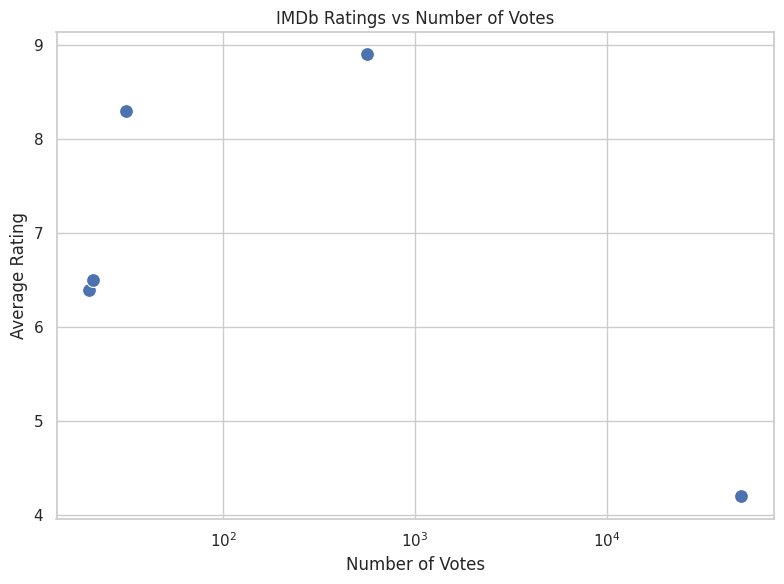

In [ ]:
# Scatter plot
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='numVotes', y='averageRating', s=100)
plt.title('IMDb Ratings vs Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.xscale('log')
plt.tight_layout()
plt.show()

<Axes: xlabel='numVotes', ylabel='averageRating'>

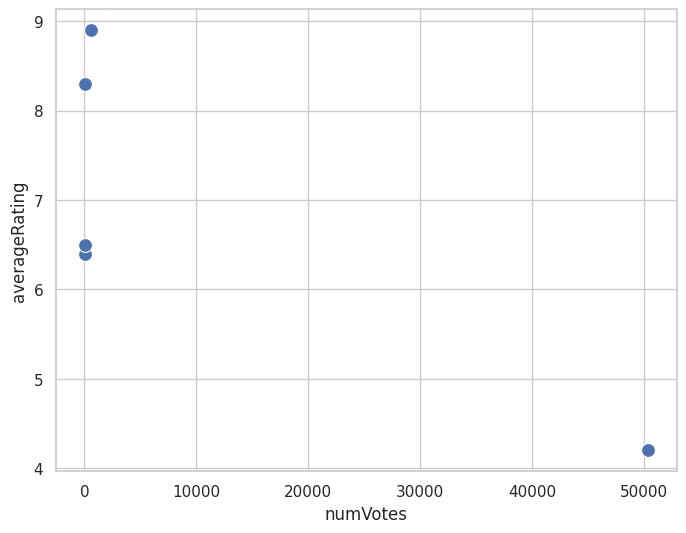

In [ ]:
# The relationship between numVotes and averageRating from a movie dataset (df).
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='numVotes', y='averageRating', s=100)

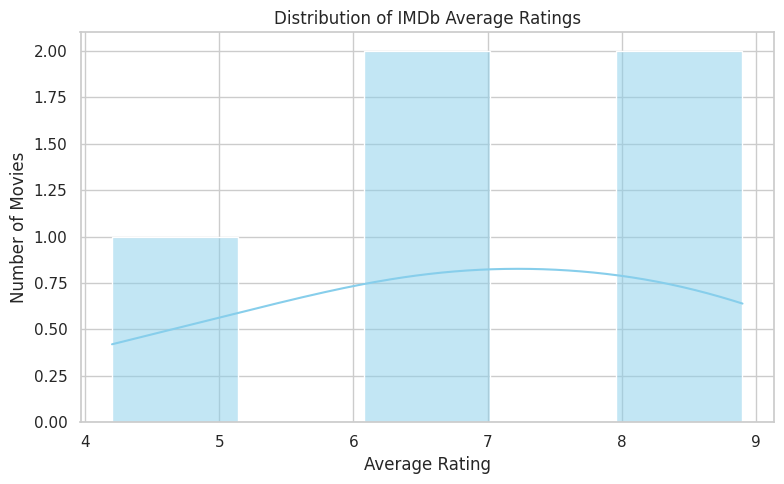

In [ ]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['averageRating'], bins=5, kde=True, color='skyblue')
plt.title('Distribution of IMDb Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

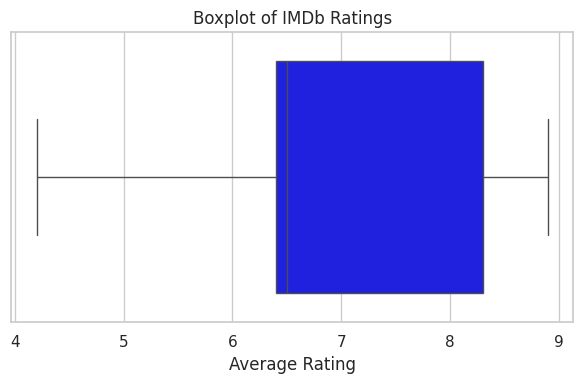

In [ ]:
# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['averageRating'], color='blue')
plt.title('Boxplot of IMDb Ratings')
plt.xlabel('Average Rating')
plt.tight_layout()
plt.show()

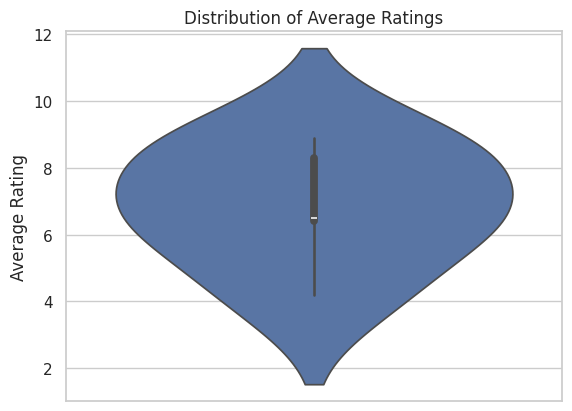

In [ ]:
# violinplot
sns.violinplot(y=df['averageRating'])
plt.title('Distribution of Average Ratings')
plt.ylabel('Average Rating')
plt.show()

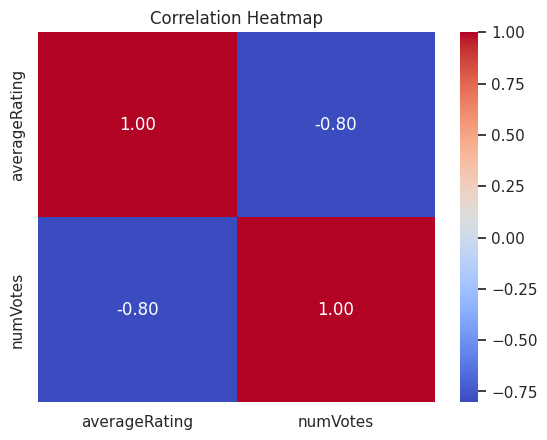

In [ ]:
#heatmap
corr = df[['averageRating', 'numVotes']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()